In [1]:
# importing necessary packages
import os
from pathlib import Path
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
import pandas as pd
from matplotlib.colors import LinearSegmentedColormap

# change working directory
#os.chdir(r"C:\Users\sebes\Documents\TURBINE\TRANSLOCATOMEREPO\compartmentalized_EMT_Boolean_model_Mendik_et_al_2021\EMT_heatmap")


Bad key "text.kerning_factor" on line 4 in
/home/david/anaconda2/envs/python_3_env/lib/python3.7/site-packages/matplotlib/mpl-data/stylelib/_classic_test_patch.mplstyle.
You probably need to get an updated matplotlibrc file from
https://github.com/matplotlib/matplotlib/blob/v3.1.3/matplotlibrc.template
or from the matplotlib source distribution


In [2]:

# change here if you want to plot a simulation /name of the folder where data is located/


#foldername = "04_transloc_EMT19_translocv4.0.2"
#sheet='20200921_1229'

#foldername = "04_transloc_EMT19_translocv4.4"
#sheet='20201007_1507'

foldername = "04_transloc_EMT19_translocv4.4_TGFBR_true.xlsx"
sheet='Sheet1'
attr_data = pd.read_excel("data/"+ foldername, sheet_name=sheet, engine="openpyxl")


# if the following variable isFalse  then the script looks for the percentage values in the KI_KO folder
# otherwise it looks for them in the Attractor stability folder
TGFB_boolean = False

attr_data = attr_data.transpose()


new_header = attr_data.iloc[0] #grab the first row for the header
attr_data = attr_data[1:] #take the data less the header row
attr_data.columns = new_header #set the header row as the df header

attr_data

Unnamed: 0,AKT,AXIN2_cyto,AXIN2_nuc,Bcatenin_memb,Bcatenin_nuc,Dest_compl,Ecadherin,Ecadherin_CTF,GLI_cyto,GLI_nuc,...,ZEB2,average steps,count,dist_from_E,dist_from_M,max steps,miR200,min steps,node_diff_from_E,node_diff_from_M
E_AKT_KO,False,False,True,True,False,False,True,False,True,True,...,False,357,25,14,16,1141,True,140,Dest_compl\nGLI_cyto\nGLI_nuc\nGSK3B_cyto\nMEK...,AKT\nAXIN2_cyto\nAXIN2_nuc\nBcatenin_memb\nBca...
E_AXIN2_cyto_KO,True,False,True,False,True,False,False,True,True,True,...,True,345,25,27,3,440,False,235,AKT\nBcatenin_memb\nBcatenin_nuc\nDest_compl\n...,AXIN2_cyto\nAXIN2_nuc\nSOS_GRB2
E_AXIN2_nuc_KI,True,True,True,False,True,False,False,True,True,True,...,True,407,25,28,2,545,False,241,AKT\nAXIN2_cyto\nBcatenin_memb\nBcatenin_nuc\n...,AXIN2_nuc\nSOS_GRB2
E_Bcatenin_memb_KI,True,False,True,True,False,False,False,True,True,True,...,True,369,25,25,5,623,False,203,AKT\nDest_compl\nEcadherin\nEcadherin_CTF\nGLI...,AXIN2_cyto\nAXIN2_nuc\nBcatenin_memb\nBcatenin...
E_Bcatenin_nuc_KO,True,False,True,False,False,False,False,True,True,True,...,True,385,25,26,4,687,False,210,AKT\nBcatenin_memb\nDest_compl\nEcadherin\nEca...,AXIN2_cyto\nAXIN2_nuc\nBcatenin_nuc\nSOS_GRB2
E_Dest_compl_KI,True,True,False,False,True,True,False,True,True,True,...,True,466,25,28,2,655,False,263,AKT\nAXIN2_cyto\nAXIN2_nuc\nBcatenin_memb\nBca...,Dest_compl\nSOS_GRB2
E_Ecadherin_KI,True,False,True,True,False,False,True,False,True,True,...,True,341,25,23,7,588,False,161,AKT\nDest_compl\nGLI_cyto\nGLI_nuc\nGSK3B_cyto...,AXIN2_cyto\nAXIN2_nuc\nBcatenin_memb\nBcatenin...
E_Ecadherin_CTF_KO,True,True,False,False,True,False,False,False,True,True,...,True,466,25,28,2,695,False,304,AKT\nAXIN2_cyto\nAXIN2_nuc\nBcatenin_memb\nBca...,Ecadherin_CTF\nSOS_GRB2
E_GLI_cyto_KO,True,True,False,False,True,False,False,True,False,False,...,True,463,25,27,3,677,False,349,AKT\nAXIN2_cyto\nAXIN2_nuc\nBcatenin_memb\nBca...,GLI_cyto\nGLI_nuc\nSOS_GRB2
E_GLI_nuc_KO,True,True,False,False,True,False,False,True,True,False,...,True,473,25,28,2,743,False,269,AKT\nAXIN2_cyto\nAXIN2_nuc\nBcatenin_memb\nBca...,GLI_nuc\nSOS_GRB2


In [3]:
df = attr_data
df = df[~df.index.str.contains("M_")]

In [4]:
df

Unnamed: 0,AKT,AXIN2_cyto,AXIN2_nuc,Bcatenin_memb,Bcatenin_nuc,Dest_compl,Ecadherin,Ecadherin_CTF,GLI_cyto,GLI_nuc,...,ZEB2,average steps,count,dist_from_E,dist_from_M,max steps,miR200,min steps,node_diff_from_E,node_diff_from_M
E_AKT_KO,False,False,True,True,False,False,True,False,True,True,...,False,357,25,14,16,1141,True,140,Dest_compl\nGLI_cyto\nGLI_nuc\nGSK3B_cyto\nMEK...,AKT\nAXIN2_cyto\nAXIN2_nuc\nBcatenin_memb\nBca...
E_AXIN2_cyto_KO,True,False,True,False,True,False,False,True,True,True,...,True,345,25,27,3,440,False,235,AKT\nBcatenin_memb\nBcatenin_nuc\nDest_compl\n...,AXIN2_cyto\nAXIN2_nuc\nSOS_GRB2
E_AXIN2_nuc_KI,True,True,True,False,True,False,False,True,True,True,...,True,407,25,28,2,545,False,241,AKT\nAXIN2_cyto\nBcatenin_memb\nBcatenin_nuc\n...,AXIN2_nuc\nSOS_GRB2
E_Bcatenin_memb_KI,True,False,True,True,False,False,False,True,True,True,...,True,369,25,25,5,623,False,203,AKT\nDest_compl\nEcadherin\nEcadherin_CTF\nGLI...,AXIN2_cyto\nAXIN2_nuc\nBcatenin_memb\nBcatenin...
E_Bcatenin_nuc_KO,True,False,True,False,False,False,False,True,True,True,...,True,385,25,26,4,687,False,210,AKT\nBcatenin_memb\nDest_compl\nEcadherin\nEca...,AXIN2_cyto\nAXIN2_nuc\nBcatenin_nuc\nSOS_GRB2
E_Dest_compl_KI,True,True,False,False,True,True,False,True,True,True,...,True,466,25,28,2,655,False,263,AKT\nAXIN2_cyto\nAXIN2_nuc\nBcatenin_memb\nBca...,Dest_compl\nSOS_GRB2
E_Ecadherin_KI,True,False,True,True,False,False,True,False,True,True,...,True,341,25,23,7,588,False,161,AKT\nDest_compl\nGLI_cyto\nGLI_nuc\nGSK3B_cyto...,AXIN2_cyto\nAXIN2_nuc\nBcatenin_memb\nBcatenin...
E_Ecadherin_CTF_KO,True,True,False,False,True,False,False,False,True,True,...,True,466,25,28,2,695,False,304,AKT\nAXIN2_cyto\nAXIN2_nuc\nBcatenin_memb\nBca...,Ecadherin_CTF\nSOS_GRB2
E_GLI_cyto_KO,True,True,False,False,True,False,False,True,False,False,...,True,463,25,27,3,677,False,349,AKT\nAXIN2_cyto\nAXIN2_nuc\nBcatenin_memb\nBca...,GLI_cyto\nGLI_nuc\nSOS_GRB2
E_GLI_nuc_KO,True,True,False,False,True,False,False,True,True,False,...,True,473,25,28,2,743,False,269,AKT\nAXIN2_cyto\nAXIN2_nuc\nBcatenin_memb\nBca...,GLI_nuc\nSOS_GRB2


In [5]:
df = df.loc[:, np.any(df.isin(['True', 'False']).values, axis=0)]


In [6]:
df

Unnamed: 0,AKT,AXIN2_cyto,AXIN2_nuc,Bcatenin_memb,Bcatenin_nuc,Dest_compl,Ecadherin,Ecadherin_CTF,GLI_cyto,GLI_nuc,...,SNAI2_cyto,SNAI2_nuc,SOS_GRB2,TGFBR,TGFBR_icd,TWIST1_nuc,ZEB1_cyto,ZEB1_nuc,ZEB2,miR200
E_AKT_KO,False,False,True,True,False,False,True,False,True,True,...,True,False,False,True,True,True,False,False,False,True
E_AXIN2_cyto_KO,True,False,True,False,True,False,False,True,True,True,...,True,True,False,True,True,True,True,True,True,False
E_AXIN2_nuc_KI,True,True,True,False,True,False,False,True,True,True,...,True,True,False,True,True,True,True,True,True,False
E_Bcatenin_memb_KI,True,False,True,True,False,False,False,True,True,True,...,True,True,False,True,True,True,True,True,True,False
E_Bcatenin_nuc_KO,True,False,True,False,False,False,False,True,True,True,...,True,True,False,True,True,True,True,True,True,False
E_Dest_compl_KI,True,True,False,False,True,True,False,True,True,True,...,True,True,False,True,True,True,True,True,True,False
E_Ecadherin_KI,True,False,True,True,False,False,True,False,True,True,...,True,True,False,True,True,True,True,True,True,False
E_Ecadherin_CTF_KO,True,True,False,False,True,False,False,False,True,True,...,True,True,False,True,True,True,True,True,True,False
E_GLI_cyto_KO,True,True,False,False,True,False,False,True,False,False,...,True,True,False,True,True,True,True,True,True,False
E_GLI_nuc_KO,True,True,False,False,True,False,False,True,True,False,...,True,True,False,True,True,True,True,True,True,False


In [7]:
df = df.apply(lambda x: x == "True")
df

Unnamed: 0,AKT,AXIN2_cyto,AXIN2_nuc,Bcatenin_memb,Bcatenin_nuc,Dest_compl,Ecadherin,Ecadherin_CTF,GLI_cyto,GLI_nuc,...,SNAI2_cyto,SNAI2_nuc,SOS_GRB2,TGFBR,TGFBR_icd,TWIST1_nuc,ZEB1_cyto,ZEB1_nuc,ZEB2,miR200
E_AKT_KO,False,False,True,True,False,False,True,False,True,True,...,True,False,False,True,True,True,False,False,False,True
E_AXIN2_cyto_KO,True,False,True,False,True,False,False,True,True,True,...,True,True,False,True,True,True,True,True,True,False
E_AXIN2_nuc_KI,True,True,True,False,True,False,False,True,True,True,...,True,True,False,True,True,True,True,True,True,False
E_Bcatenin_memb_KI,True,False,True,True,False,False,False,True,True,True,...,True,True,False,True,True,True,True,True,True,False
E_Bcatenin_nuc_KO,True,False,True,False,False,False,False,True,True,True,...,True,True,False,True,True,True,True,True,True,False
E_Dest_compl_KI,True,True,False,False,True,True,False,True,True,True,...,True,True,False,True,True,True,True,True,True,False
E_Ecadherin_KI,True,False,True,True,False,False,True,False,True,True,...,True,True,False,True,True,True,True,True,True,False
E_Ecadherin_CTF_KO,True,True,False,False,True,False,False,False,True,True,...,True,True,False,True,True,True,True,True,True,False
E_GLI_cyto_KO,True,True,False,False,True,False,False,True,False,False,...,True,True,False,True,True,True,True,True,True,False
E_GLI_nuc_KO,True,True,False,False,True,False,False,True,True,False,...,True,True,False,True,True,True,True,True,True,False


In [8]:
#special_cases = ["MEK", "GSK3B_nuc"]

In [9]:
import re
pattern = "(E_)(.*)(_)(.*)"

substring = [re.search(pattern, s).group(2) for s in df.index]
df.index = substring


In [10]:
#df = df.loc[special_cases]

In [11]:
df = df.loc['MEK']

In [12]:
df.index = ['MEK 1', 'MEK 2']

In [13]:
df

Unnamed: 0,AKT,AXIN2_cyto,AXIN2_nuc,Bcatenin_memb,Bcatenin_nuc,Dest_compl,Ecadherin,Ecadherin_CTF,GLI_cyto,GLI_nuc,...,SNAI2_cyto,SNAI2_nuc,SOS_GRB2,TGFBR,TGFBR_icd,TWIST1_nuc,ZEB1_cyto,ZEB1_nuc,ZEB2,miR200
MEK 1,True,False,True,True,False,False,True,False,False,False,...,True,True,True,True,True,True,True,True,True,False
MEK 2,True,True,False,False,True,False,False,True,True,False,...,True,True,True,True,True,True,True,True,True,False


# adding initial states

In [14]:
# first figure
# load in actual data

#foldername = "04_transloc_EMT19_translocv4.4"
foldername = "data"
e_initial_file = foldername+'/02_Initial states/EMT_E.txt'
m_initial_file = foldername+'/02_Initial states/EMT_M.txt'

#e_initial_file = '02_Initial states/EMT_E.txt'
#m_initial_file = '02_Initial states/EMT_M.txt'

def read_initial_file(filename):
    states = {}
    with open(filename, 'r') as f:
        for line in f:
            line = line.strip()
            if line == "":
                return pd.DataFrame.from_dict(states)
            if line[0] != '#':
                parts = line.split('=')
                states[parts[0]] = [parts[1] == 'True']
            
e_initial_state = read_initial_file(e_initial_file)
m_initial_state = read_initial_file(m_initial_file)
e_initial_state.index = ['E']
m_initial_state.index = ['M']

In [15]:
m_initial_state

,AKT,AXIN2_cyto,AXIN2_nuc,Bcatenin_memb,Bcatenin_nuc,Dest_compl,Ecadherin,Ecadherin_CTF,GLI_cyto,GLI_nuc,...,SNAI2_cyto,SNAI2_nuc,SOS_GRB2,miR200,TGFBR,TGFBR_icd,TWIST1_nuc,ZEB1_nuc,ZEB1_cyto,ZEB2
M,True,True,False,False,True,False,False,True,True,True,...,True,True,True,False,True,True,True,True,True,True


In [16]:
attractor_map = pd.concat([df, e_initial_state, m_initial_state])

In [17]:
attractor_map

,AKT,AXIN2_cyto,AXIN2_nuc,Bcatenin_memb,Bcatenin_nuc,Dest_compl,Ecadherin,Ecadherin_CTF,GLI_cyto,GLI_nuc,...,SNAI2_cyto,SNAI2_nuc,SOS_GRB2,TGFBR,TGFBR_icd,TWIST1_nuc,ZEB1_cyto,ZEB1_nuc,ZEB2,miR200
MEK 1,True,False,True,True,False,False,True,False,False,False,...,True,True,True,True,True,True,True,True,True,False
MEK 2,True,True,False,False,True,False,False,True,True,False,...,True,True,True,True,True,True,True,True,True,False
E,False,False,True,True,False,True,True,False,False,False,...,False,False,False,False,False,False,False,False,False,True
M,True,True,False,False,True,False,False,True,True,True,...,True,True,True,True,True,True,True,True,True,False


In [18]:
attractor_map.loc['E']

AKT              False
AXIN2_cyto       False
AXIN2_nuc         True
Bcatenin_memb     True
Bcatenin_nuc     False
Dest_compl        True
Ecadherin         True
Ecadherin_CTF    False
GLI_cyto         False
GLI_nuc          False
GSK3B_cyto        True
GSK3B_nuc         True
MEK              False
NOTCH            False
NOTCH_ic_cyto    False
NOTCH_ic_nuc     False
SMAD_cyto        False
SMAD_nuc         False
SNAI1_cyto       False
SNAI1_nuc        False
SNAI2_cyto       False
SNAI2_nuc        False
SOS_GRB2         False
TGFBR            False
TGFBR_icd        False
TWIST1_nuc       False
ZEB1_cyto        False
ZEB1_nuc         False
ZEB2             False
miR200            True
Name: E, dtype: bool

In [19]:
attractor_map["E_diff"] = 0
for row in attractor_map.index:
    penalty = 0
    for col in attractor_map.columns:
        if col != "E_diff":
            if attractor_map.loc[row, col] != attractor_map.loc["E", col]:
                penalty += 1
    attractor_map.loc[row, 'E_diff'] = penalty
attractor_map.loc["M", "E_diff"] = len(attractor_map.columns)
attractor_map = attractor_map.sort_values("E_diff")
attractor_map = attractor_map.drop(columns = ["E_diff"])

In [20]:
t_attr_data = attractor_map.copy()

In [21]:
booleandf = t_attr_data.select_dtypes(include=[bool])
booleanDictionary = {True: 'TRUE', False: 'FALSE'}

for column in booleandf:
    t_attr_data[column] = t_attr_data[column].map(booleanDictionary)

In [22]:
t_attr_data

,AKT,AXIN2_cyto,AXIN2_nuc,Bcatenin_memb,Bcatenin_nuc,Dest_compl,Ecadherin,Ecadherin_CTF,GLI_cyto,GLI_nuc,...,SNAI2_cyto,SNAI2_nuc,SOS_GRB2,TGFBR,TGFBR_icd,TWIST1_nuc,ZEB1_cyto,ZEB1_nuc,ZEB2,miR200
E,FALSE,FALSE,TRUE,TRUE,FALSE,TRUE,TRUE,FALSE,FALSE,FALSE,...,FALSE,FALSE,FALSE,FALSE,FALSE,FALSE,FALSE,FALSE,FALSE,TRUE
MEK 1,TRUE,FALSE,TRUE,TRUE,FALSE,FALSE,TRUE,FALSE,FALSE,FALSE,...,TRUE,TRUE,TRUE,TRUE,TRUE,TRUE,TRUE,TRUE,TRUE,FALSE
MEK 2,TRUE,TRUE,FALSE,FALSE,TRUE,FALSE,FALSE,TRUE,TRUE,FALSE,...,TRUE,TRUE,TRUE,TRUE,TRUE,TRUE,TRUE,TRUE,TRUE,FALSE
M,TRUE,TRUE,FALSE,FALSE,TRUE,FALSE,FALSE,TRUE,TRUE,TRUE,...,TRUE,TRUE,TRUE,TRUE,TRUE,TRUE,TRUE,TRUE,TRUE,FALSE


In [23]:
c_attr_data = attractor_map.copy()
for row in c_attr_data.index:
    for col in c_attr_data.columns:
        c_attr_data.loc[row, col] = attractor_map.loc[row, col] != attractor_map.loc["E", col]

In [24]:
c_attr_data

,AKT,AXIN2_cyto,AXIN2_nuc,Bcatenin_memb,Bcatenin_nuc,Dest_compl,Ecadherin,Ecadherin_CTF,GLI_cyto,GLI_nuc,...,SNAI2_cyto,SNAI2_nuc,SOS_GRB2,TGFBR,TGFBR_icd,TWIST1_nuc,ZEB1_cyto,ZEB1_nuc,ZEB2,miR200
E,False,False,False,False,False,False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False
MEK 1,True,False,False,False,False,True,False,False,False,False,...,True,True,True,True,True,True,True,True,True,True
MEK 2,True,True,True,True,True,True,True,True,True,False,...,True,True,True,True,True,True,True,True,True,True
M,True,True,True,True,True,True,True,True,True,True,...,True,True,True,True,True,True,True,True,True,True


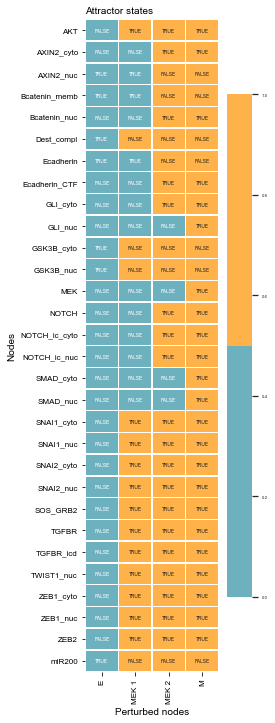

In [25]:
# A4 heatmap with new colors  
# az epitheliális nódusok színe hexben: 6DB1BF
# mezenchimális szín: FF9F1C
a4_dims = (11.7, 8.27)
f, axes = plt.subplots(1, 1, figsize = (len(attractor_map.columns)/10, len(attractor_map.index)*3))
c_attr_dataT = c_attr_data.transpose()
t_attr_dataT = t_attr_data.transpose()

#cmap=sns.diverging_palette(340, 20, n=2)
cmap = sns.color_palette(['#6db1bf','#ffb249'] )
sns.set(font_scale=0.4)
#p_emt_hm = sns.heatmap(p_data, cmap = 'Greens', annot = True, linewidths=.5, linecolor='white', fmt='d', ax=axes[1])
emt_hm = sns.heatmap(c_attr_dataT, cmap = cmap, annot = t_attr_dataT, linewidths=.5, linecolor='white',  fmt = '')
emt_hm.set_ylabel('Nodes', fontsize = 10)
emt_hm.set_xlabel('Perturbed nodes', fontsize = 10)
emt_hm.set_title('Attractor states', fontsize = 10, loc = 'left')
emt_hm.set_xticklabels(emt_hm.get_xmajorticklabels(), fontsize = 8, rotation = 90)
emt_hm.set_yticklabels(emt_hm.get_ymajorticklabels(), size = 8)



#f.suptitle(foldername, ha = 'right')

#p_emt_hm.set_ylabel('Attractor name')
#p_emt_hm.set_xlabel('Nodes')
#p_emt_hm.set_title('Attractor percentages (KI/KO simulations)', fontsize = 10, loc = 'left')

#f.subplots_adjust(left=None, bottom=None, right=None, top=None, wspace=None, hspace=0.4)

# exporting the figure to .png format
f.savefig(foldername + '_heatmap_true.png', dpi = 400, bbox_inches='tight')